### Implementing Simple chatbot using LangGraph

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

### Reducers
from typing import Annotated
from langgraph.graph.message import add_messages ## reducer

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [8]:
import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [11]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen/qwen3-32b")
llm.invoke("Hello i am siddardha , i like to play cricket")

AIMessage(content="<think>\nOkay, the user is Siddardha and he mentioned he likes to play cricket. Let me start by acknowledging his name and interest. I should respond in a friendly and encouraging way. Maybe ask him about his favorite team or position in the game. Also, I can invite him to share more about his experiences or what he enjoys most about cricket. Keep the conversation open-ended to let him express himself. Let me make sure the tone is positive and engaging.\n</think>\n\nHello Siddardha! 🏏 Nice to meet you! Cricket is an amazing sport—how long have you been playing? Do you have a favorite position (batsman, bowler, fielder) or a particular team you root for? I'd love to hear more about what you enjoy most about the game!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 163, 'prompt_tokens': 21, 'total_tokens': 184, 'completion_time': 0.390794466, 'completion_tokens_details': None, 'prompt_time': 0.001060232, 'prompt_tokens_details': None, 'q

### Creating Nodes

In [12]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

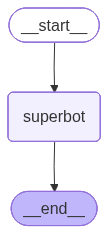

In [13]:
from IPython.display import Image,display
graph = StateGraph(State)

graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [14]:
## invocation

graph_builder.invoke({"messages":"Hi my name is siddu, i like cricket"})

{'messages': [HumanMessage(content='Hi my name is siddu, i like cricket', additional_kwargs={}, response_metadata={}, id='1f04ab6e-3f04-4892-bf36-4f322e38b7de'),
  AIMessage(content="<think>\nOkay, the user introduced themselves as Siddu and mentioned they like cricket. Let me think about how to respond appropriately. First, I should acknowledge their name and interest. Maybe ask them why they like cricket to keep the conversation going. I should keep it friendly and open-ended. Let me check if there's anything else they might want to share. Maybe they play the game or follow a particular team. I should invite them to talk more about it. Also, make sure the response is positive and encouraging. Alright, that should cover it.\n</think>\n\nHi Siddu! Nice to meet you! 🏏 Cricket is such an amazing sport—it's great that you enjoy it! Do you follow any particular team or player? Do you play the game yourself, or are you more of a passionate viewer? Let me know—I'd love to hear more about wha

### Streaming the responses

In [16]:
for event in graph_builder.stream({"messages":"Hello my name is siddardha"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello my name is siddardha', additional_kwargs={}, response_metadata={}, id='04c31cab-ffdd-4b7f-bc28-3fe9389cc98e')]}
{'messages': [HumanMessage(content='Hello my name is siddardha', additional_kwargs={}, response_metadata={}, id='04c31cab-ffdd-4b7f-bc28-3fe9389cc98e'), AIMessage(content='<think>\nOkay, the user said, "Hello my name is siddardha". I should respond with a friendly greeting. I need to acknowledge their name and offer assistance. I\'ll keep it simple and welcoming.\n</think>\n\nHello Siddardha! It\'s a pleasure to meet you. How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 16, 'total_tokens': 85, 'completion_time': 0.127558734, 'completion_tokens_details': None, 'prompt_time': 0.000461743, 'prompt_tokens_details': None, 'queue_time': 0.051513747, 'total_time': 0.128020477}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier